## Content List

- IMDB Rating이랑 join해서 인기도 확인(clear)
- 결측치를 어떻게 채울 것인가?


- 연도별 인기 컨텐츠(세영)
- 나라별 인기 컨텐츠(나영)
- TV show -vs- Movie?(재헌)
<br>
<br>
<br>
- 아래는 keep
- 시청 등급별 컨텐츠
- 다작왕 배우(혹은 감독?)


In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.font_manager as fm
import plotly.graph_objects as go
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('../../../archive/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Replacments
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops
df.dropna(inplace=True)

# Drop Duplicates
df.drop_duplicates(inplace= True)

In [4]:
x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

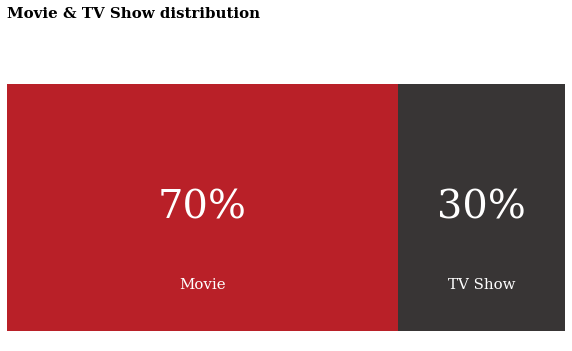

In [5]:
idx = mf_ratio.index
fig, ax = plt.subplots(1,1,figsize=(10, 5))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

ax.annotate(f"{int(mf_ratio['Movie'][idx]*100)}%", 
               xy=(mf_ratio['Movie'][idx]/2, idx),
               va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
               color='white')

ax.annotate("Movie", 
               xy=(mf_ratio['Movie'][idx]/2, -0.25),
               va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
               color='white')

ax.annotate(f"{int(mf_ratio['TV Show'][idx]*100)}%", 
               xy=(mf_ratio['Movie'][idx]+mf_ratio['TV Show'][idx]/2, idx),
               va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
               color='white')
ax.annotate("TV Show", 
               xy=(mf_ratio['Movie'][idx]+mf_ratio['TV Show'][idx]/2, -0.25),
               va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
               color='white')

fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
plt.show()

In [6]:
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].head()

# Rating ages from this notebook: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

In [7]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,first_country,target_ages,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",USA,Teens,[Documentaries]
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,Adults,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,USA,Adults,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",USA,Adults,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India,Adults,"[International TV Shows, Romantic TV Shows, TV..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",USA,Adults,"[Cult Movies, Dramas, Thrillers]"
8803,s8804,TV Show,Zombie Dumb,No Data,No Data,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",USA,Older Kids,"[Kids' TV, Korean TV Shows, TV Comedies]"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,USA,Adults,"[Comedies, Horror Movies]"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",USA,Older Kids,"[Children & Family Movies, Comedies]"


In [19]:
temp = df[['type','target_ages','genre']]
temp

,type,target_ages,genre
0,Movie,Teens,[Documentaries]
1,TV Show,Adults,"[International TV Shows, TV Dramas, TV Mysteries]"
2,TV Show,Adults,"[Crime TV Shows, International TV Shows, TV Ac..."
3,TV Show,Adults,"[Docuseries, Reality TV]"
4,TV Show,Adults,"[International TV Shows, Romantic TV Shows, TV..."
...,...,...,...
8802,Movie,Adults,"[Cult Movies, Dramas, Thrillers]"
8803,TV Show,Older Kids,"[Kids' TV, Korean TV Shows, TV Comedies]"
8804,Movie,Adults,"[Comedies, Horror Movies]"
8805,Movie,Older Kids,"[Children & Family Movies, Comedies]"


In [29]:
s_data = pd.DataFrame()
for genre in temp['genre']:
    new_data = pd.DataFrame({'target_ages':['Teens']*len(genre),'genre':genre})
    s_data = s_data.append(new_data)

In [30]:
s_data

,target_ages,genre
0,Teens,Documentaries
0,Teens,International TV Shows
1,Teens,TV Dramas
2,Teens,TV Mysteries
0,Teens,Crime TV Shows
...,...,...
0,Teens,Children & Family Movies
1,Teens,Comedies
0,Teens,Dramas
1,Teens,International Movies


In [31]:
temp2 = temp[temp['target_ages']=='Teens'][['genre','type']]
temp2

,genre,type
0,[Documentaries],Movie
8,"[British TV Shows, Reality TV]",TV Show
9,"[Comedies, Dramas]",Movie
18,[Thrillers],Movie
20,"[Crime TV Shows, Docuseries, International TV ...",TV Show
...,...,...
8774,"[Dramas, Independent Movies, International Mov...",Movie
8782,"[Comedies, Horror Movies, Independent Movies]",Movie
8794,"[Dramas, Independent Movies, International Mov...",Movie
8799,"[Dramas, International Movies]",Movie


In [28]:
pd.merge(s_data, temp2)

,genre,type,target_ages
0,Documentaries,Movie,Teens
1,Documentaries,Movie,Teens
2,Documentaries,Movie,Teens
3,Documentaries,Movie,Teens
4,Documentaries,Movie,Teens
...,...,...,...
3197484,Children & Family Movies,TV Show,Teens
3197485,Children & Family Movies,TV Show,Teens
3197486,Children & Family Movies,TV Show,Teens
3197487,Children & Family Movies,TV Show,Teens


In [ ]:
for genre in temp['genre']:
    

In [11]:
df[df['target_ages']=='Teens'][['type','genre']]

,type,genre
0,Movie,[Documentaries]
8,TV Show,"[British TV Shows, Reality TV]"
9,Movie,"[Comedies, Dramas]"
18,Movie,[Thrillers]
20,TV Show,"[Crime TV Shows, Docuseries, International TV ..."
...,...,...
8774,Movie,"[Dramas, Independent Movies, International Mov..."
8782,Movie,"[Comedies, Horror Movies, Independent Movies]"
8794,Movie,"[Dramas, Independent Movies, International Mov..."
8799,Movie,"[Dramas, International Movies]"


In [9]:
for idx, genre in zip(df['genre'].index, df['genre']):
    print(df['first_country'].iloc[idx], genre)

USA ['Documentaries']
South Africa ['International TV Shows', 'TV Dramas', 'TV Mysteries']
USA ['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure']
USA ['Docuseries', 'Reality TV']
India ['International TV Shows', 'Romantic TV Shows', 'TV Comedies']
USA ['TV Dramas', 'TV Horror', 'TV Mysteries']
USA ['Children & Family Movies']
USA ['Dramas', 'Independent Movies', 'International Movies']
UK ['British TV Shows', 'Reality TV']
USA ['Comedies', 'Dramas']
USA ['Crime TV Shows', 'Docuseries', 'International TV Shows']
USA ['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure']
Germany ['Dramas', 'International Movies']
USA ['Children & Family Movies', 'Comedies']
USA ['British TV Shows', 'Crime TV Shows', 'Docuseries']
USA ['TV Comedies', 'TV Dramas']
USA ['Documentaries', 'International Movies']
Mexico ['Crime TV Shows', 'Spanish-Language TV Shows', 'TV Dramas']
USA ['Thrillers']
USA ['International TV Shows', 'Spanish-Language TV Shows', 'TV Action & Adventu

S. Korea ['Crime TV Shows', 'International TV Shows', 'Korean TV Shows']
Canada ['TV Horror', 'TV Mysteries', 'TV Thrillers']
China ['Dramas', 'International Movies', 'Thrillers']
Thailand ['International TV Shows', 'TV Dramas', 'Teen TV Shows']
USA ['Docuseries', 'Science & Nature TV']
India ['Dramas', 'International Movies', 'Romantic Movies']
USA ['Documentaries']
USA ['Children & Family Movies', 'Music & Musicals']
USA ['Children & Family Movies', 'Comedies', 'Music & Musicals']
USA ['Children & Family Movies', 'Music & Musicals']
USA ['Children & Family Movies']
USA ['Docuseries']
USA ['Children & Family Movies']
USA ['Children & Family Movies']
USA ['Children & Family Movies']
Israel ['Romantic TV Shows', 'TV Comedies', 'TV Dramas']
China ['Action & Adventure', 'Anime Features', 'International Movies']
USA ["Kids' TV", 'TV Comedies']
USA ['International TV Shows', 'Reality TV']
USA ['Comedies']
China ['Anime Series', 'International TV Shows', 'Romantic TV Shows']
S. Korea ['Drama

USA ['Crime TV Shows', 'TV Dramas']
Brazil ['International TV Shows', 'TV Dramas', 'TV Mysteries']
Nigeria ['Comedies', 'International Movies']
USA ['Thrillers']
France ['Comedies', 'International Movies', 'Romantic Movies']
Nigeria ['Dramas', 'International Movies', 'Romantic Movies']
Mexico ['Crime TV Shows', 'International TV Shows', 'Spanish-Language TV Shows']
USA ['Children & Family Movies', 'Comedies']
USA ['Reality TV', 'Science & Nature TV']
Belarus ['British TV Shows', "Kids' TV", 'TV Comedies']
Nigeria ['Dramas', 'International Movies', 'Thrillers']
Italy ['Comedies', 'International Movies']
USA ['Docuseries']
Australia ['Stand-Up Comedy']
France ['Documentaries', 'International Movies', 'Music & Musicals']
South Africa ['Dramas', 'International Movies']
Brazil ['International TV Shows', 'Reality TV', 'Romantic TV Shows']
USA ['Docuseries', 'Reality TV', 'Science & Nature TV']
Egypt ['Comedies', 'International Movies']
USA ['Documentaries']
USA ["Kids' TV", 'TV Action & Adve

UK ['British TV Shows', 'International TV Shows', 'Reality TV']
UK ['British TV Shows', "Kids' TV"]
Turkey ['Comedies', 'International Movies', 'Romantic Movies']
India ["Kids' TV", 'TV Comedies']
USA ["Kids' TV", 'Korean TV Shows']
Spain ['Comedies', 'Dramas', 'International Movies']
USA ["Kids' TV"]
Nigeria ['Action & Adventure', 'Dramas', 'International Movies']
UK ['Documentaries']
USA ['Comedies', 'Dramas']
Netherlands ['International TV Shows', 'TV Comedies']
Nigeria ['Dramas', 'International Movies']
India ['Comedies', 'Dramas', 'International Movies']
Indonesia ['Dramas', 'Faith & Spirituality', 'International Movies']
China ['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure']
Australia ["Kids' TV", 'TV Thrillers']
S. Korea ['International TV Shows', 'Korean TV Shows', 'Romantic TV Shows']
USA ['Documentaries']
USA ['Documentaries']
S. Korea ['Stand-Up Comedy']
S. Korea ['International TV Shows', 'Korean TV Shows', 'Romantic TV Shows']
USA ['Horror Movies']
USA

India ['International Movies', 'Thrillers']
India ['Dramas', 'International Movies']
India ['Comedies', 'International Movies', 'Romantic Movies']
India ['Comedies', 'Dramas', 'International Movies']
India ['Comedies', 'Dramas', 'International Movies']
India ['Comedies', 'International Movies']
India ['Action & Adventure', 'International Movies']
India ['Action & Adventure', 'International Movies']
India ['Comedies', 'International Movies', 'Sci-Fi & Fantasy']
USA ['Children & Family Movies']
USA ['Children & Family Movies']
USA ['Comedies', 'Dramas', 'Independent Movies']
India ['Action & Adventure', 'Dramas', 'International Movies']
India ['Dramas', 'International Movies', 'Romantic Movies']
India ['Comedies', 'International Movies', 'Music & Musicals']
India ['Action & Adventure', 'Dramas', 'International Movies']
India ['Comedies', 'Dramas', 'Independent Movies']
India ['Action & Adventure', 'International Movies']
India ['Horror Movies', 'International Movies', 'Thrillers']
India 

USA ["Kids' TV"]
USA ['Dramas', 'Independent Movies']
Canada ["Kids' TV"]
India ['Dramas', 'Thrillers']
Japan ['Documentaries']
USA ['Action & Adventure']
USA ['Comedies', 'Independent Movies', 'International Movies']
India ['Anime Series', 'International TV Shows']
USA ['Stand-Up Comedy']
Mexico ['TV Action & Adventure', 'TV Dramas']
USA ['Dramas', 'Independent Movies', 'International Movies']
China ["Kids' TV"]
USA ['Stand-Up Comedy']
Japan ['Comedies', 'Dramas', 'Independent Movies']
Australia ['Action & Adventure', 'Dramas', 'International Movies']
Australia ['Music & Musicals', 'Stand-Up Comedy']
USA ['International TV Shows', 'TV Dramas']
USA ['Docuseries', 'International TV Shows', 'Science & Nature TV']
Canada ['Docuseries', 'International TV Shows', 'Science & Nature TV']
USA ['Action & Adventure', 'Comedies']
USA ['Stand-Up Comedy']
Belgium ['Comedies']
USA ['Documentaries', 'Sports Movies']
Japan ['Stand-Up Comedy']
USA ['Dramas', 'International Movies']
Canada ['Horror Movi

USA ['International TV Shows', 'Korean TV Shows', 'Reality TV']
USA ['Horror Movies', 'International Movies', 'Thrillers']
USA ['Dramas', 'Independent Movies', 'International Movies']
Thailand ['Documentaries', 'Sports Movies']
UK ['Documentaries']
USA ['Documentaries']
USA ['International TV Shows', 'Spanish-Language TV Shows', 'TV Comedies']
USA ['Comedies', 'Dramas', 'International Movies']
Canada ['Documentaries', 'International Movies']
China ['Action & Adventure']
India ['Action & Adventure', 'Dramas']
USA ['Comedies']
USA ['Children & Family Movies', 'Documentaries']
USA ['Comedies', 'International Movies', 'Romantic Movies']
USA ['Dramas', 'Independent Movies']
France ['Comedies', 'Dramas', 'Independent Movies']
Taiwan ['Dramas', 'Faith & Spirituality', 'Romantic Movies']
USA ['TV Comedies']
UK ['Documentaries', 'International Movies', 'Sports Movies']
Turkey ['Action & Adventure', 'International Movies', 'Sci-Fi & Fantasy']
Serbia ['Comedies', 'International Movies', 'Romantic

USA ['Documentaries', 'International Movies']
USA ['Comedies', 'Independent Movies', 'LGBTQ Movies']
New Zealand ['Dramas', 'Sports Movies']
USA ['Horror Movies', 'International Movies', 'Thrillers']
UK ['Horror Movies']
Norway ['Dramas', 'Independent Movies']
Indonesia ['Comedies', 'International Movies']
USA ['Comedies']
USA ['British TV Shows', 'Crime TV Shows', 'TV Dramas']
USA ['Action & Adventure', 'Cult Movies', 'International Movies']
India ['Children & Family Movies', 'Comedies']
Israel ['Children & Family Movies', 'Comedies', 'Romantic Movies']
USA ['Action & Adventure', 'Dramas', 'International Movies']
USA ['Action & Adventure', 'Sci-Fi & Fantasy']
USA ['Documentaries']
UK ['Action & Adventure', 'International Movies']
USA ['Horror Movies']
USA ['TV Dramas']
USA ['Dramas']
S. Korea ['Documentaries', 'Sports Movies']
UK ['Dramas', 'Thrillers']
India ['British TV Shows', "Kids' TV"]
USA ['Docuseries', 'International TV Shows', 'Science & Nature TV']
UK ['Comedies', 'Dramas', 

IndexError: single positional indexer is out-of-bounds

In [8]:
df.groupby('first_country')['genre'].sum().sort_values(ascending=False)[:10]

first_country
Israel      [TV Action & Adventure, TV Dramas, TV Mysterie...
Colombia    [Stand-Up Comedy, Crime TV Shows, Internationa...
Spain       [Sci-Fi & Fantasy, Thrillers, Crime TV Shows, ...
Canada      [Sci-Fi & Fantasy, Thrillers, Children & Famil...
Finland     [Kids' TV, TV Comedies, Crime TV Shows, Intern...
Cyprus                                [Kids' TV, TV Comedies]
S. Korea    [Kids' TV, Korean TV Shows, Kids' TV, Korean T...
Russia      [Kids' TV, Kids' TV, Korean TV Shows, TV Comed...
Denmark     [Kids' TV, International TV Shows, TV Mysterie...
Jordan      [International TV Shows, TV Dramas, Teen TV Sh...
Name: genre, dtype: object

In [66]:
df['genre']

0                                         [Documentaries]
1       [International TV Shows, TV Dramas, TV Mysteries]
2       [Crime TV Shows, International TV Shows, TV Ac...
3                                [Docuseries, Reality TV]
4       [International TV Shows, Romantic TV Shows, TV...
                              ...                        
8802                     [Cult Movies, Dramas, Thrillers]
8803             [Kids' TV, Korean TV Shows, TV Comedies]
8804                            [Comedies, Horror Movies]
8805                 [Children & Family Movies, Comedies]
8806     [Dramas, International Movies, Music & Musicals]
Name: genre, Length: 8790, dtype: object

In [61]:
temp = []
for g_list in df['genre']:
    for i in g_list:
        temp.append(i)

In [63]:
set(temp)

{'Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers'}

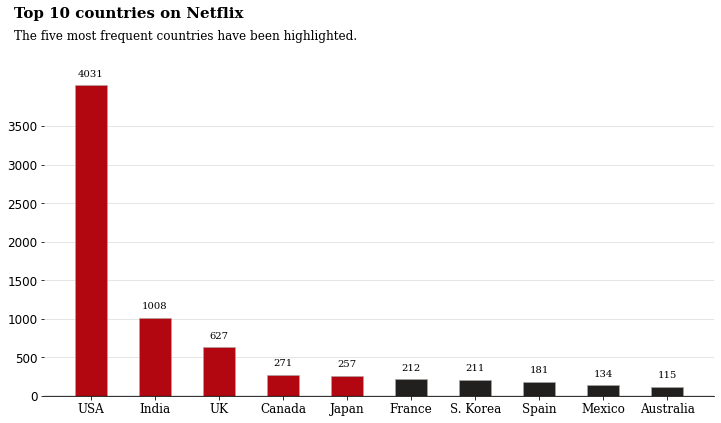

In [29]:
df['count'] = 1
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

# Plot

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = color_map[3] = color_map[4] = '#b20710' # color highlight
color_map[5] = color_map[6] = color_map[7] = color_map[8] = color_map[9] ='#221f1f' # color highlight
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title
fig.text(0.09, 1, 'Top 5 countries on Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The five most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')


ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)


plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [78]:
from collections import Counter

def find_genre(df, country, c):
    global gc
    for genre in df[df['first_country']==country]['genre']:
        gc += Counter(genre)
    
    return gc.most_common(c)

def visualize(df):
    color_map = ['#b20710', '#221f1f']
    fig, ax = plt.subplots(1,1, figsize=(12, 6))
    sns.barplot(data=pd.DataFrame(df, columns=['Genre','Count']),palette=color_map, x='Genre',y='Count')

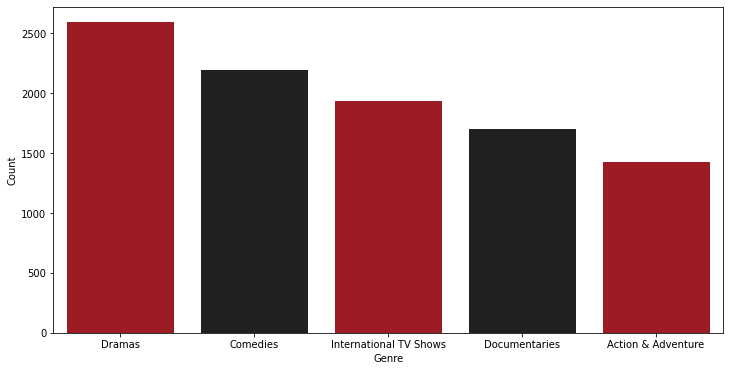

In [79]:
temp=find_genre(df, 'S. Korea', 5)
visualize(temp)

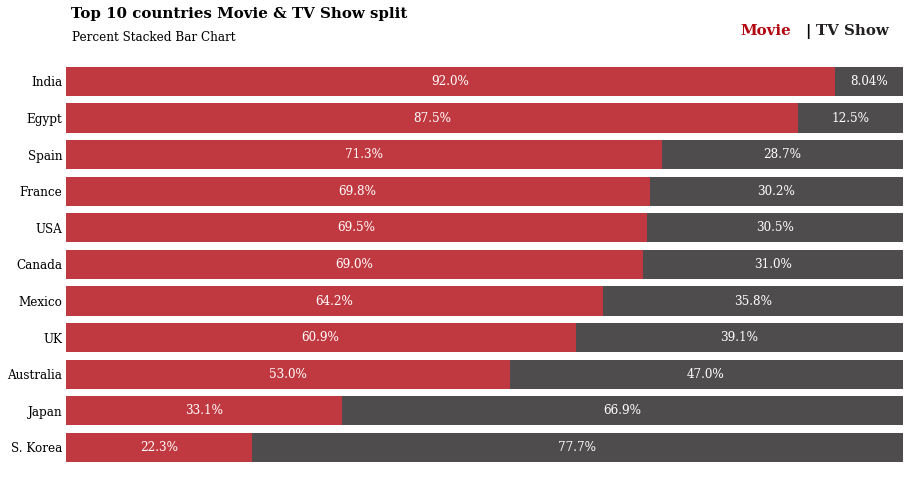

In [30]:
country_order = df['first_country'].value_counts()[:11].index
data_q2q3 = df[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]




###
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## Insight

- 인도는 발리우드의 영향 때문 인지 Movie가 많고
- 우리나라는 예상대로 드라마 시리즈를 선호하는 경향이 있다.

In [37]:
order = pd.DataFrame(df.groupby('target_ages')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['target_ages'])

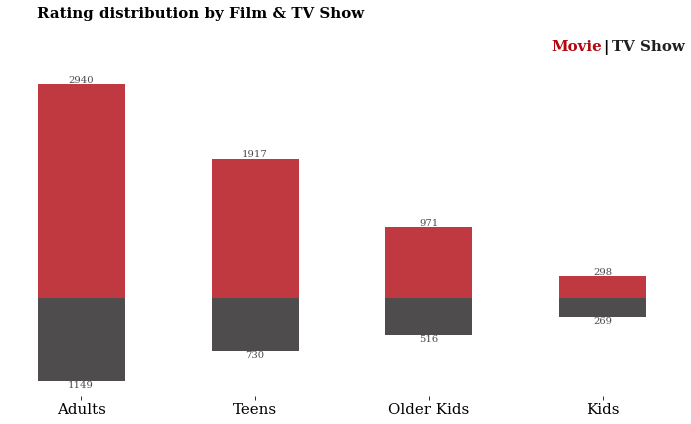

In [41]:
mf = df.groupby('type')['target_ages'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
 
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif', fontsize=15)
ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.16, 1, 'Rating distribution by Film & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')



fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()

## Insight

- 성인컨텐츠가 가장 많은 것을 확인할 수 있다.

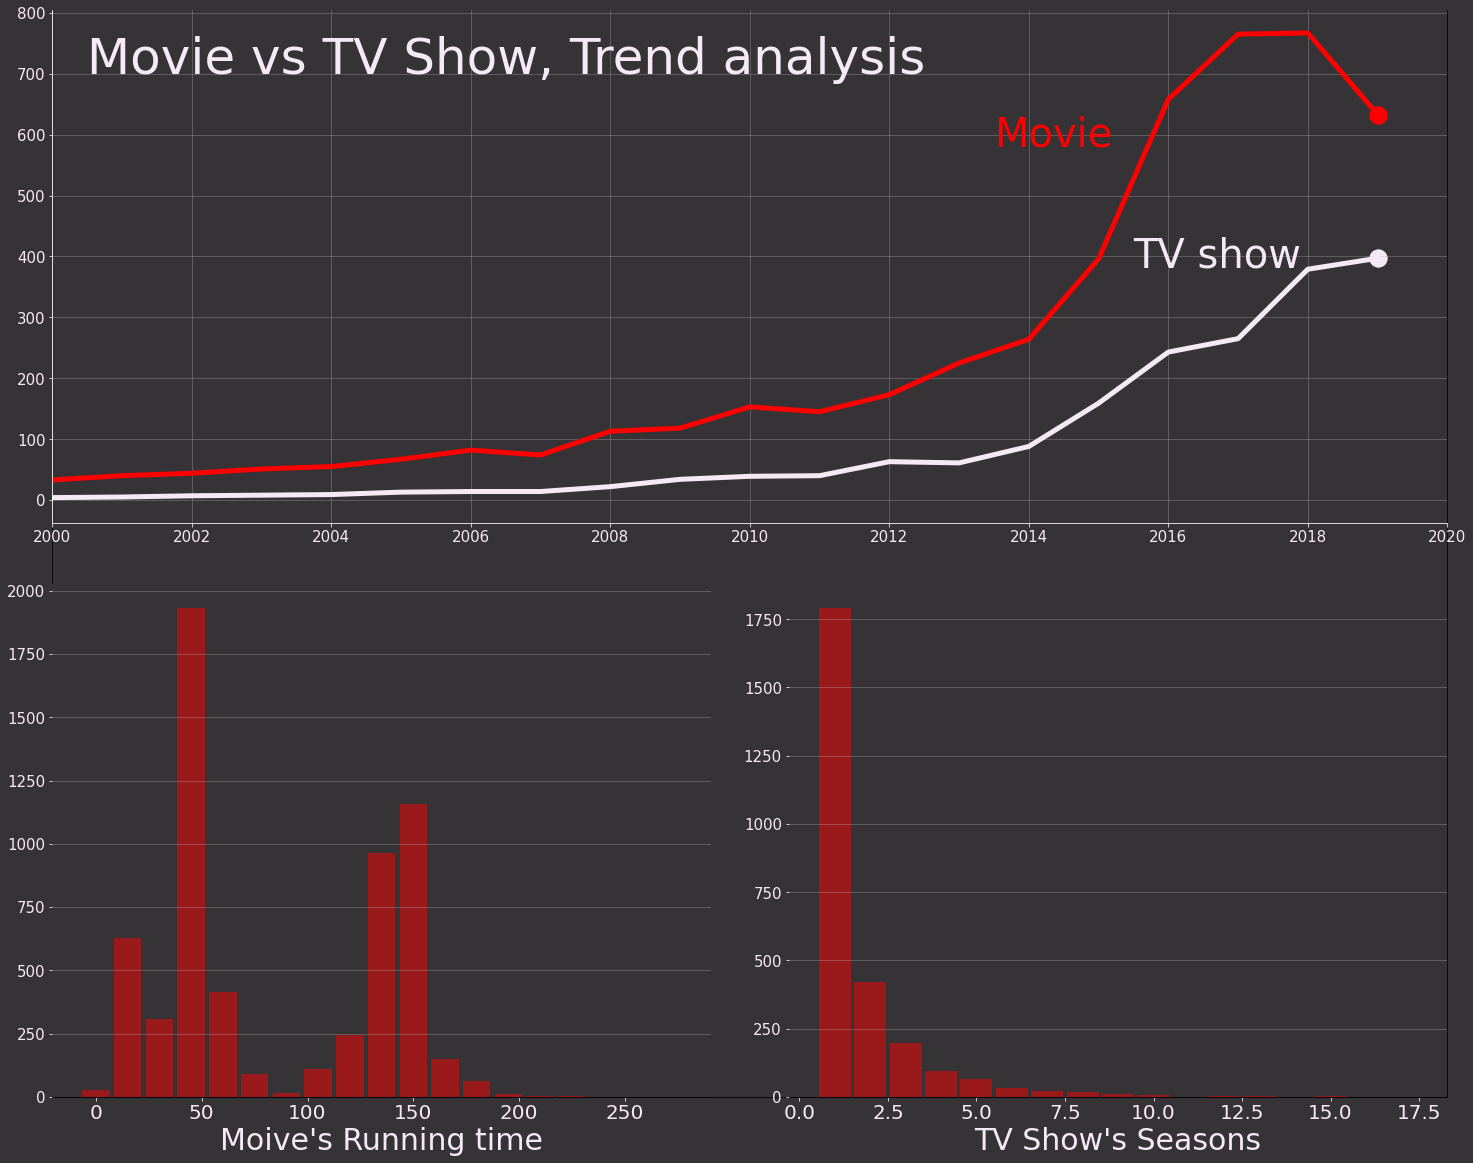

In [129]:
type_data = df[['type','release_year']]
TV_show = type_data[type_data['type'] =='TV Show'].groupby('release_year')['type'].count()
Movie = type_data[type_data['type'] =='Movie'].groupby('release_year')['type'].count()

fig, ax = plt.subplots(figsize=(25,20),facecolor="#363336")
ax.patch.set_facecolor('#363336')

spec = gridspec.GridSpec(ncols=21, nrows=21, figure=fig)
ax1 = fig.add_subplot(spec[:10, :],facecolor="#363336")
ax2 = fig.add_subplot(spec[11:, :10],facecolor="#363336")
ax3 = fig.add_subplot(spec[11:, 11:],facecolor="#363336")


ax1.scatter(x= list(dict(TV_show).keys())[-3],y=list(dict(TV_show).values())[-3],s=300, color='#F5E9F5')
ax1.scatter(x= list(dict(Movie).keys())[-3],y=list(dict(Movie).values())[-3],s=300, color='red')
sns.lineplot(x= list(dict(TV_show).keys())[:-2],y=list(dict(TV_show).values())[:-2],lw=5, color='#F5E9F5',ax=ax1)
sns.lineplot(x= list(dict(Movie).keys())[:-2],y=list(dict(Movie).values())[:-2],lw=5, color='red',ax=ax1)
ax1.text(s="Movie", x=2013.5, y= 600,color='red', va="center",ha="left",fontsize=40)
ax1.text(s="TV show", x=2015.5, y= 400,color='#F5E9F5', va="center",ha="left",fontsize=40)
ax1.set_xticks(list(range(2000,2022,2)))
ax1.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax1.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xlim(2000,2020)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(True, alpha=0.4)
ax1.text(s="Movie vs TV Show, Trend analysis", x= 2000.5,y=700,color='#F5E9F5',fontsize=50)


moive_running_time = df[df['type'] =='Movie']['duration'].apply(lambda x : x.split(" ")[0])
moive_running_time = pd.to_numeric(moive_running_time)
movie_running_time = pd.DataFrame(moive_running_time)
def make_range(x):
    return x//15

moive_running_time = moive_running_time.apply(make_range)
moive_running_time = pd.DataFrame(moive_running_time.value_counts())
moive_running_time['index'] = moive_running_time.reset_index()['index']*15

ax2.bar(x = moive_running_time['index'], height = moive_running_time['duration'],width=13,color ='red',alpha=0.5)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set_xlabel("Moive's Running time",  color='#F5E9F5', fontsize=30)
ax2.tick_params(axis='x', colors='#F5E9F5',labelsize=20)
ax2.set_ylabel("")
ax2.set_ylabel("")
ax2.grid(True, alpha=0.4,axis='y')
ax2.tick_params(axis='y', colors='#F5E9F5',labelsize=15)


TV_seasons = df[df['type'] =='TV Show']['duration'].apply(lambda x : x.split(" ")[0])
TV_seasons = pd.to_numeric(TV_seasons)
TV_seasons = pd.DataFrame(TV_seasons.value_counts())
ax3.bar(x = TV_seasons.index, height = TV_seasons.duration,width=0.9,color ='red',alpha=0.5)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.set_xlabel("TV Show's Seasons", color='#F5E9F5', fontsize=30)
ax3.tick_params(axis='x', colors='#F5E9F5',labelsize=20)
ax3.set_ylabel("")
ax3.set_ylabel("")
ax3.grid(True, alpha=0.4,axis='y')
ax3.tick_params(axis='y', colors='#F5E9F5',labelsize=15)

ax.set_xticks([])
ax.set_yticks([])

plt.show()

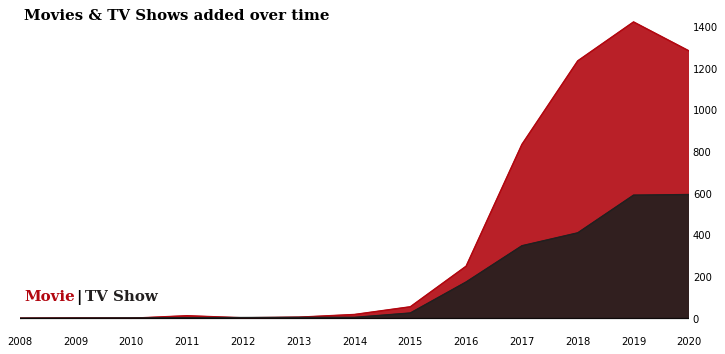

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = df[df['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)


for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')


fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## Insight

- 2019 covid 이후로 컨텐츠 제작이 줄어든 것을 확인할 수 있다.

In [46]:
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

df['month_name_added'] = pd.Categorical(df['month_name_added'], categories=month_order, ordered=True)

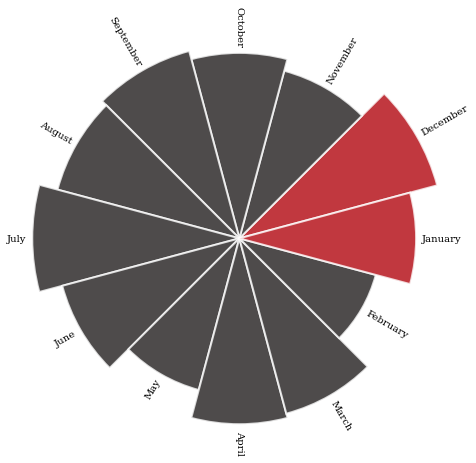

In [50]:
data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T
data_sub2 = data_sub

data_sub2['Value'] = data_sub2['Movie'] + data_sub2['TV Show']
data_sub2 = data_sub2.reset_index()

df_polar = data_sub2.sort_values(by='month_name_added',ascending=False)


color_map = ['#221f1f' for _ in range(12)]
color_map[0] = color_map[11] =  '#b20710' # color highlight


# initialize the figure
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 30
lowerLimit = 1
labelPadding = 30

# Compute max and min in the dataset
max = df_polar['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_polar.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_polar.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_polar.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color_map,alpha=0.8
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_polar["month_name_added"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, fontsize=10,fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor")

In [ ]:
>>> 여기까지했어요 <<<

In [3]:
netflix_origin

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [46]:
netflix_origin["date_added"] = pd.to_datetime(netflix_origin['date_added'])
netflix_origin['year_added'] = netflix_origin['date_added'].dt.year
netflix_origin['month_added'] = netflix_origin['date_added'].dt.month

## 연도별 컨텐츠 수

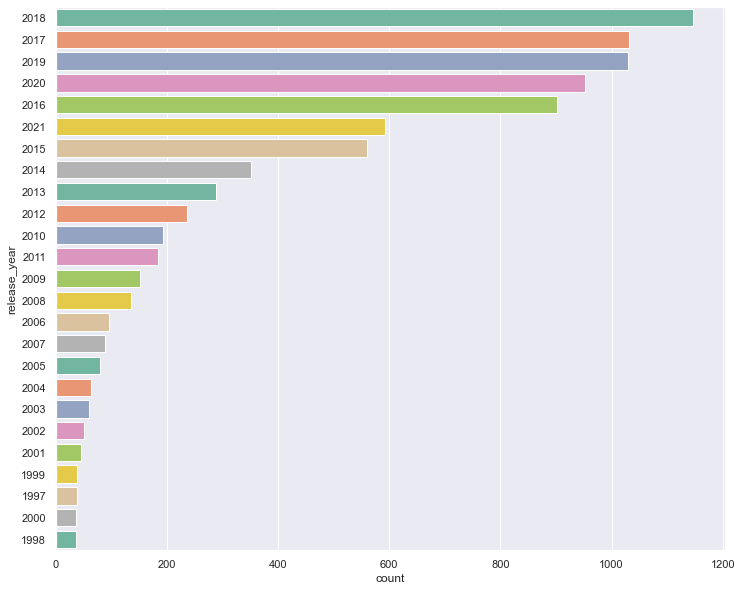

In [16]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_origin, palette="Set2", order=netflix_origin['release_year'].value_counts().index[0:25])

## Movie -vs- Tvshow

<AxesSubplot:ylabel='type'>

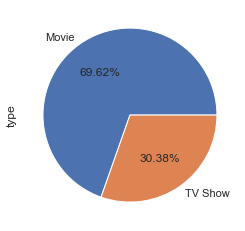

In [32]:
netflix_origin['type'].value_counts().plot(kind='pie', autopct = "%.2f%%")

type
Movie      AxesSubplot(0.125,0.125;0.352273x0.755)
TV Show    AxesSubplot(0.125,0.125;0.352273x0.755)
Name: release_year, dtype: object

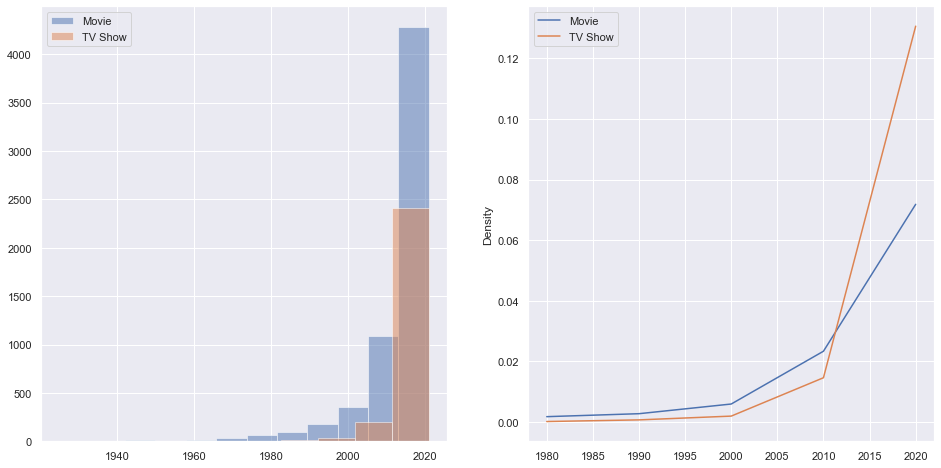

In [35]:
fig, axs = plt.subplots(ncols=2,figsize=(16, 8))
netflix_origin.groupby('type')['release_year'].plot(kind='kde', ax=axs[1], ind=[1980,1990,2000,2010,2020],legend=True)
netflix_origin.groupby('type')['release_year'].hist(alpha=0.5, ax=axs[0], legend=True)

In [47]:
d1 = netflix_origin[netflix_origin["type"] == "TV Show"]
d2 = netflix_origin[netflix_origin["type"] == "Movie"]

col = "date_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

- 2010년을 기점으로 Tv Show 시리즈가 Movie보다 더 높은 비율로 많이 제작되는 것을 확인할 수 있다.
- 즉 기울기가 더 가파름

## Data Join

In [36]:
imdb_ratings = pd.read_csv('./archive/data.tsv', sep='\t')
imdb_basics = pd.read_csv('./archive/basics_data.tsv', sep='\t')
imdb_ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1864
1,tt0000002,6.0,244
2,tt0000003,6.5,1632
3,tt0000004,5.8,158
4,tt0000005,6.2,2459
...,...,...,...
1221008,tt9916690,6.6,5
1221009,tt9916720,5.7,191
1221010,tt9916730,8.4,5
1221011,tt9916766,6.7,18


In [19]:
imdb_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
8749007,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
8749008,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
8749009,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
8749010,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [22]:
imdb_joint=imdb_ratings.merge(imdb_basics,left_on='tconst',right_on='tconst',how='inner')
imdb_joint=imdb_joint.sort_values(by='averageRating', ascending=False)

In [23]:
imdb_joint

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
583265,tt12799278,10.0,7,tvEpisode,Gerador de Energia,Gerador de Energia,0,2015,\N,\N,"Action,Adventure,Comedy"
983146,tt4757782,10.0,6,tvEpisode,Episode dated 2 May 2000,Episode dated 2 May 2000,0,2000,\N,\N,Drama
1114198,tt7123148,10.0,25,tvEpisode,Episode #1.43,Episode #1.43,0,2008,\N,\N,Talk-Show
1114197,tt7123146,10.0,25,tvEpisode,Episode #1.42,Episode #1.42,0,2008,\N,\N,Talk-Show
510380,tt11202418,10.0,7,video,The Pact,The Pact,0,2020,\N,\N,Drama
...,...,...,...,...,...,...,...,...,...,...,...
252380,tt0473109,1.0,12,movie,Eine weisse unter Kannibalen,Eine weisse unter Kannibalen,0,1921,\N,\N,Adventure
1197557,tt9154904,1.0,28,tvEpisode,Episode #1.14,Episode #1.14,0,2018,\N,\N,"Comedy,Romance"
648035,tt14300584,1.0,27,tvEpisode,Episode #1.36,Episode #1.36,0,2014,\N,\N,"Drama,Romance"
648039,tt14300600,1.0,27,tvEpisode,Episode #1.37,Episode #1.37,0,2014,\N,\N,"Drama,Romance"


In [24]:
joint_data=imdb_joint.merge(netflix_origin,left_on='originalTitle',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='averageRating', ascending=False)

In [25]:
joint_data

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,tt4779328,10.0,5,short,The Rehearsal,The Rehearsal,0,2019,\N,18,...,The Rehearsal,Alison MacLean,"James Rolleston, Kerry Fox, Ella Edwards, Alic...",New Zealand,"January 1, 2018",2016,TV-MA,102 min,"Dramas, Independent Movies, International Movies",A drama student is torn between creative possi...
26,tt1106949,10.0,8,tvEpisode,Paradise Lost,Paradise Lost,0,1999,\N,\N,...,Paradise Lost,Monique Gardenberg,"Júlio Andrade, Lee Taylor, Hermila Guedes, Jul...",Brazil,"September 29, 2018",2018,TV-MA,111 min,"Dramas, Independent Movies, International Movies",A cop moonlights as the bodyguard for a young ...
490,tt1989043,10.0,17,tvEpisode,The Main Event,The Main Event,0,2011,\N,\N,...,The Main Event,Jay Karas,"Seth Carr, Tichina Arnold, Adam Pally, Ken Mar...",United States,"April 10, 2020",2020,TV-G,103 min,"Children & Family Movies, Comedies, Sports Movies","Using special powers from a magical mask, a yo..."
496,tt0541975,10.0,7,tvEpisode,She's the One,She's the One,0,2000,\N,\N,...,She's the One,Mae Czarina Cruz,"Bea Alonzo, Dingdong Dantes, Enrique Gil",Philippines,"December 10, 2020",2013,TV-14,111 min,"Dramas, International Movies, Romantic Movies",When his best friend gets stranded in the rain...
285,tt18212948,10.0,7,short,Aftermath,Aftermath,0,2020,\N,23,...,Aftermath,Peter Winther,"Ashley Greene, Shawn Ashmore, Sharif Atkins, B...",United States,"August 4, 2021",2021,TV-MA,115 min,Horror Movies,"Desperate to save their marriage, a young coup..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,tt16257816,1.1,11,tvEpisode,Bad Blood,Bad Blood,0,2021,\N,\N,...,Bad Blood,NaN,"Anthony LaPaglia, Kim Coates, Enrico Colantoni...",Canada,"May 31, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, TV Dramas",This sprawling crime drama follows the true st...
3873,tt3882974,1.0,7,tvEpisode,The Trap,The Trap,0,1961,\N,7,...,The Trap,Erik White,"T.I., Mike Epps, Loretta Devine, Queen Latifah...",United States,"April 1, 2019",2017,TV-MA,91 min,Comedies,A man returns home to Atlanta to try and turn ...
11624,tt1540829,1.0,11,video,Conspiracy,Conspiracy,0,2006,\N,20,...,Conspiracy,NaN,Mark Bazeley,United Kingdom,"September 1, 2016",2015,TV-14,1 Season,"British TV Shows, Docuseries",Skeptics and others discuss widely held conspi...
6968,tt4175520,1.0,5,tvEpisode,Africa,Africa,0,2014,\N,\N,...,Africa,NaN,David Attenborough,United Kingdom,"April 28, 2016",2013,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",This five-part nature series chronicles fascin...


In [26]:
joint_data.columns

Index(['tconst', 'averageRating', 'numVotes', 'titleType', 'primaryTitle',
       'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes',
       'genres', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description'],
      dtype='object')

In [29]:
joint_data = joint_data.drop(['tconst','titleType', 'primaryTitle','originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes'], axis=1)

In [30]:
joint_data

,averageRating,numVotes,genres,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,10.0,5,"Drama,Short",s8481,Movie,The Rehearsal,Alison MacLean,"James Rolleston, Kerry Fox, Ella Edwards, Alic...",New Zealand,"January 1, 2018",2016,TV-MA,102 min,"Dramas, Independent Movies, International Movies",A drama student is torn between creative possi...
26,10.0,8,"Crime,Drama",s4618,Movie,Paradise Lost,Monique Gardenberg,"Júlio Andrade, Lee Taylor, Hermila Guedes, Jul...",Brazil,"September 29, 2018",2018,TV-MA,111 min,"Dramas, Independent Movies, International Movies",A cop moonlights as the bodyguard for a young ...
490,10.0,17,Comedy,s2696,Movie,The Main Event,Jay Karas,"Seth Carr, Tichina Arnold, Adam Pally, Ken Mar...",United States,"April 10, 2020",2020,TV-G,103 min,"Children & Family Movies, Comedies, Sports Movies","Using special powers from a magical mask, a yo..."
496,10.0,7,"Crime,Drama",s1567,Movie,She's the One,Mae Czarina Cruz,"Bea Alonzo, Dingdong Dantes, Enrique Gil",Philippines,"December 10, 2020",2013,TV-14,111 min,"Dramas, International Movies, Romantic Movies",When his best friend gets stranded in the rain...
285,10.0,7,"Short,Thriller",s308,Movie,Aftermath,Peter Winther,"Ashley Greene, Shawn Ashmore, Sharif Atkins, B...",United States,"August 4, 2021",2021,TV-MA,115 min,Horror Movies,"Desperate to save their marriage, a young coup..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,1.1,11,Drama,s3788,TV Show,Bad Blood,NaN,"Anthony LaPaglia, Kim Coates, Enrico Colantoni...",Canada,"May 31, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, TV Dramas",This sprawling crime drama follows the true st...
3873,1.0,7,"Action,Adventure,Animation",s3958,Movie,The Trap,Erik White,"T.I., Mike Epps, Loretta Devine, Queen Latifah...",United States,"April 1, 2019",2017,TV-MA,91 min,Comedies,A man returns home to Atlanta to try and turn ...
11624,1.0,11,"Horror,Short,Thriller",s5802,TV Show,Conspiracy,NaN,Mark Bazeley,United Kingdom,"September 1, 2016",2015,TV-14,1 Season,"British TV Shows, Docuseries",Skeptics and others discuss widely held conspi...
6968,1.0,5,Reality-TV,s6095,TV Show,Africa,NaN,David Attenborough,United Kingdom,"April 28, 2016",2013,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",This five-part nature series chronicles fascin...


## 연도별 인기 컨텐츠

In [ ]:
이거안함

## 나라별 인기 컨텐츠

Text(0.5, 0, 'Ratio')

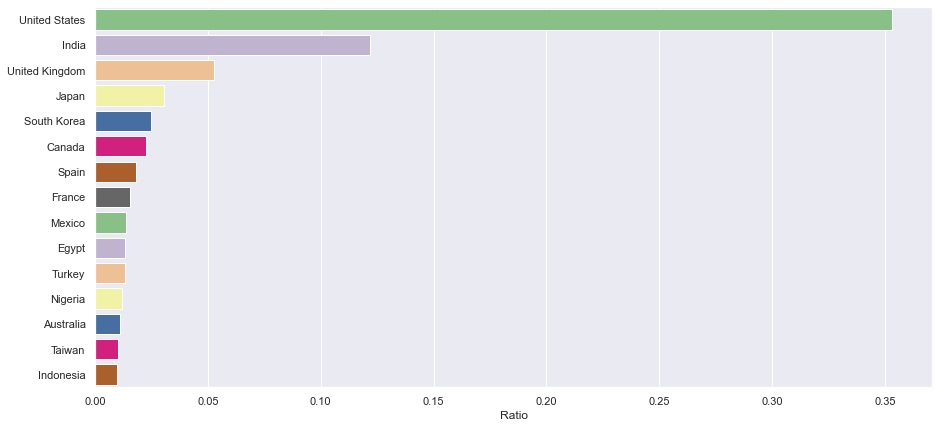

In [38]:
plt.figure(figsize = (15, 7))
country = netflix_origin['country'].value_counts(normalize=True)[:15]
sns.barplot(x = country, y = country.index, palette = "Accent")
plt.xlabel("Ratio")

In [ ]:
여기까지했어요